In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal # библиотечный метод прогонки для проверки

In [73]:
x0 = 1 / np.sqrt(3)

def k(x):
    return np.exp(-x)

def q(x):
    if (x < x0):
        return x**3
    else:
        return x
    
def f(x):
    if (x < x0):
        return x**2 - 1
    else:
        return 1

def k_diff(x):
    return -np.exp(-x)

def F(x, y):
    u = y[0]
    phi = y[1]

    return np.array([
        phi,
        (q(x) - f(x) - k_diff(x)*phi) / k(x)
    ])

In [74]:
x_start = 0
x_end = 1
u_0 = 2
u_L = 1

L = 100000 # количество точек на разностной схеме
h = (x_end - x_start) / L

l_alpha = int(np.floor(x0 / h)) - 1
l_beta = l_alpha + 1

x = np.linspace(x_start, x_end, L)
u = np.zeros(L)
u[0] = u_0
u[-1] = u_L

In [75]:
# кожффициенты приведенного уравнения
a = np.zeros(L)
b = np.zeros(L)
c = np.zeros(L)
d = np.zeros(L)

# прогоночные коэффициенты
alpha = np.zeros(L)
beta  = np.zeros(L)

In [76]:
# l in [1, l_a - 1]
for l in range(1, l_alpha):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h


# l in [l_b + 1, L - 2]
for l in range(l_beta + 1, L-1):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h

In [77]:
'''
L -- количество точек (включая концы)
точки (как и все коэффициенты) нумеруются от 0 до L-1 => ласт точка имеет индекс L-1
=> предпоследняя точка имеет индекс L-2
прогоночные коэффициенты (как и приведенные коэффициенты уравнения) привязаны к ТОЧКАМ на отрезке (включая точки концов)
коэффициенты, привязанные к концевым точкам нас не интересуют (мы к ним даже не образается => они остаются 0 до конца программы)
поэтому, первый (ненулевой) коэффициент сслева alpha[1], а справа alpha[L-2]
'''

alpha[1] = -a[1] / b[1]
beta[1]  = (d[1] - c[1] * u_0) / b[1]

alpha[L - 2] = -c[L - 2] / b[L - 2]
beta[L - 2]  = (d[L - 2] - c[L - 2] * u_L) / b[L - 2]

In [78]:
# l in [2, l_a - 1]
for l in range(2, l_alpha):
    alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
    beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])


# l in [L - 3, l_b + 1]
for l in range(L - 3, l_beta, -1):
    alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
    beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

In [79]:
u[l_alpha] = (k(l_alpha * h) * beta[l_alpha - 1] + k(l_beta * h) * beta[l_beta + 1]) / (k(l_alpha * h) * (1 - alpha[l_alpha - 1]) + k(l_beta * h) * (1 - alpha[l_beta + 1]))
u[l_beta] = u[l_alpha].copy()

u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]


for l in range(l_alpha - 1, 0, -1):
    u[l] = alpha[l] * u[l + 1] + beta[l]

for l in range(l_beta + 1, L-1):
    u[l] = alpha[l] * u[l - 1] + beta[l]

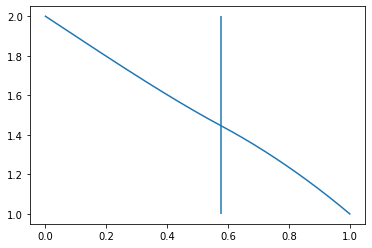

In [80]:
plt.plot(x, u)
plt.vlines(x0, min(u), max(u))

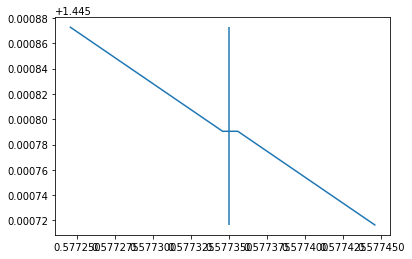

In [81]:
plt.plot(x[l_alpha-10:l_beta+10], u[l_alpha-10:l_beta+10])
plt.vlines(x0, min(u[l_alpha-10:l_beta+10]), max(u[l_alpha-10:l_beta+10]))